In [63]:
#pip3 install jupyter pandas matplotlib scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [64]:
#Importing data: CSV file reading.

df_data = pd.read_csv("children_height_age.csv")
# using: pd.read_csv("data.csv", index_col="id") change the index column (now 0, 1, 2...) for another column in the csv file
# using: pd.read_csv("data.csv", usecols=["id", "name", "price"]) you select just some columns
# Numpy could also be use to import csv data.

#How is the data given? The age is in years or months, the height is in cm or m? Is there a column with "female" and "male" or "M/F"...
df_data.head()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     2500 non-null   object 
 1   height  2500 non-null   float64
 2   age     2500 non-null   float64
dtypes: float64(2), object(1)
memory usage: 58.7+ KB


In [65]:
#Data filtering: only girls, only boys.

df_filtered_female = df_data.query('sex == "female"')
#print(df_filtered_female.head())
# another syntax: df_filtered_male = df_data[df_data["sex"] == "male"]
df_filtered_male = df_data.query('sex == "male"')


In [66]:
#Create and train the models:
#We will use simple linear regression: one independent variable: age / one dependent variable: height.

from sklearn.linear_model import LinearRegression

x_female = df_filtered_female[["age"]]
y_female = df_filtered_female["height"]
model_female = LinearRegression()
model_female.fit(x_female, y_female)

x_male = df_filtered_male[["age"]]
y_male = df_filtered_male["height"]
model_male = LinearRegression()
model_male.fit(x_male, y_male)

x_both = df_data[["age"]]
y_both = df_data["height"]
model_both = LinearRegression()
model_both.fit(x_both, y_both)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
#Once you have your model trained, make predictions:

ages_to_predict = np.array([[7.5], [8.5], [9.5], [14.5], [15.5], [16.5]])
# [[]] cause .predict expects a matrix not a 1D array

pred_female = model_female.predict(ages_to_predict)
pred_male = model_male.predict(ages_to_predict)
pred_both = model_both.predict(ages_to_predict)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


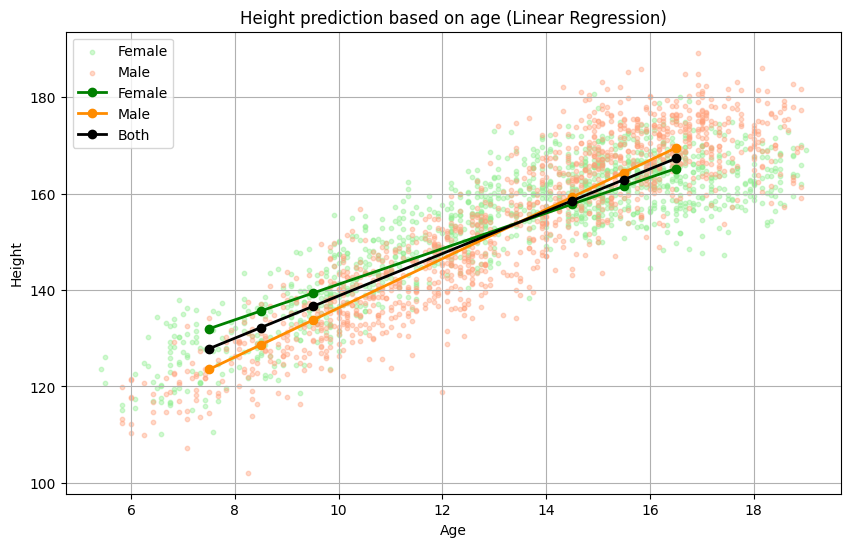

In [68]:
#Show the predictions:

plt.figure(figsize=(10, 6))

plt.scatter(x_female, y_female, label="Female", color="lightgreen", marker="o", alpha=0.4, s=10)
plt.scatter(x_male, y_male, label="Male", color="lightsalmon", marker="o", alpha=0.4, s=10)

ages = ages_to_predict.ravel()
#back to 1D arrays

plt.plot(ages, pred_female, marker='o', label='Female', color='green', linewidth=2)
plt.plot(ages, pred_male, marker='o', label='Male', color='darkorange', linewidth=2)
plt.plot(ages, pred_both, marker='o', label='Both', color='black', linewidth=2)

plt.title("Height prediction based on age (Linear Regression)")
plt.xlabel("Age")
plt.ylabel("Height")
plt.legend()
plt.grid(True)

plt.show()


In [69]:
#Export predictions chart to csv file:

df_predictions = pd.DataFrame({"Ages": ages, "Female": pred_female, 
                               "Male": pred_male, "Both": pred_both})

df_predictions.to_csv("height_predictions.csv", index=False)